# Introduction

This notebook will cover customer churn prediction, 
trying to predict customers with a higher probability of continuing with their account or not.

I'll try to address the problem using this framework:

**framework:**

* Problem definition
* Data exploration
* evaluation
* Features
* Modelling
* Experimentationation

## Importing Tools

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# for plots to appear inside notebook
%matplotlib inline

## Explore Data

#### load data

In [5]:
# import train data 
customer_train_data = pd.read_csv("data/playground-series-s4e/train.csv")
customer_train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
# import test data 
customer_test_data = pd.read_csv("data/playground-series-s4e/test.csv")
customer_test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


**for now i will explore train data**

In [10]:
# lets check len of train data
len(customer_train_data)

165034

In [11]:
# check colums' info
customer_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [12]:
# check for null values
customer_train_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
# check stats of defaulters and non dafaulters
customer_train_data["Exited"].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

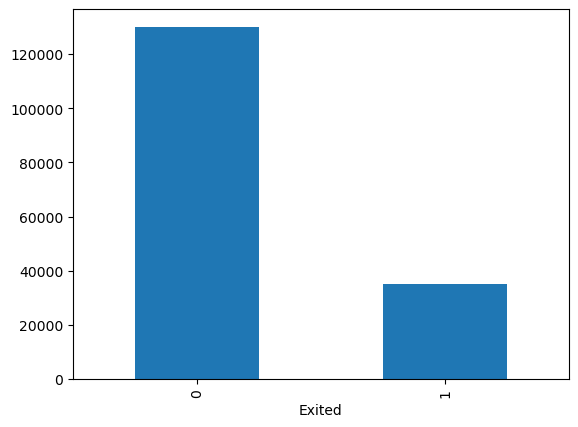

In [17]:
# visualize stats
customer_train_data["Exited"].value_counts().plot(kind="bar");

In [18]:
customer_train_data[:100]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,15791534,Scott,588,Germany,Male,30.0,10,126683.40,1,1.0,1.0,131636.55,0
96,96,15671139,Shih,659,Spain,Female,39.0,0,107042.74,1,1.0,0.0,102284.20,1
97,97,15576935,Ampt,743,Spain,Male,43.0,2,161807.18,2,0.0,1.0,93228.86,0
98,98,15669946,Shih,639,Germany,Female,43.0,7,123873.52,1,1.0,1.0,51113.17,0


In [20]:
#check active members
customer_train_data["IsActiveMember"].value_counts()

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

<Axes: xlabel='IsActiveMember'>

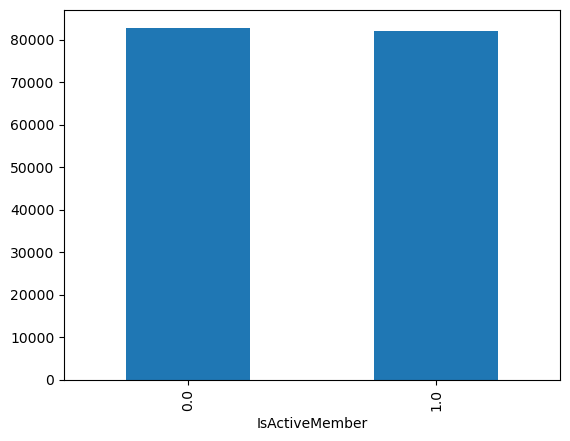

In [21]:
customer_train_data["IsActiveMember"].value_counts().plot(kind="bar")

In [26]:
# who has a credit card
customer_train_data["HasCrCard"].value_counts();

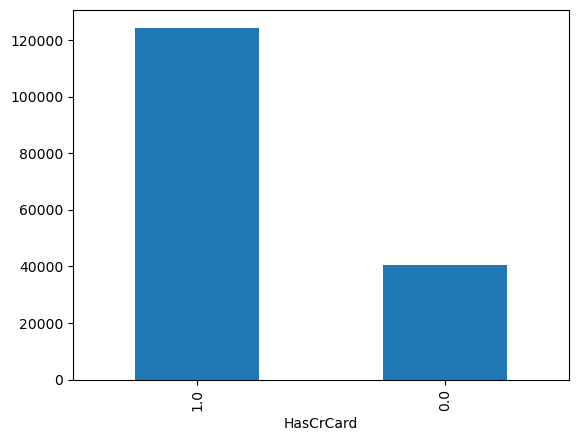

In [25]:
customer_train_data["HasCrCard"].value_counts().plot(kind="bar");

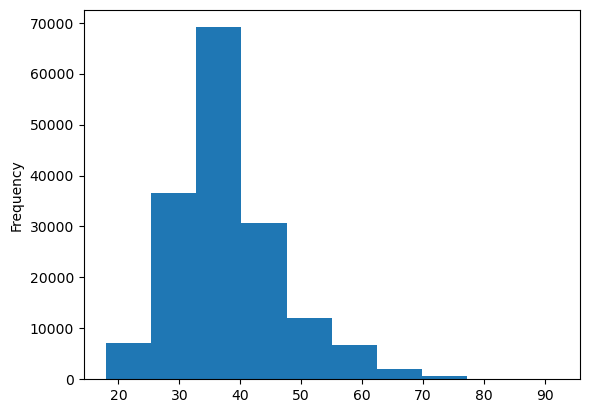

In [28]:
# check age distribution
customer_train_data.Age.plot.hist();

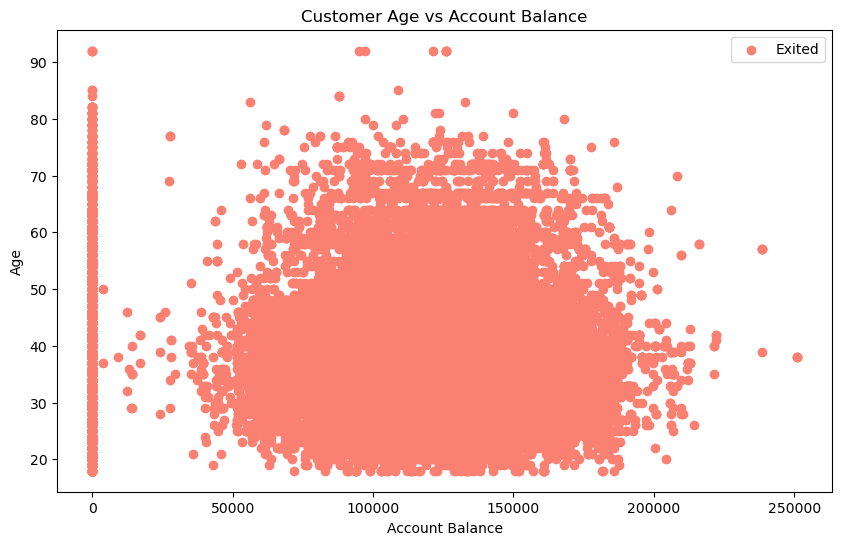

In [35]:
# plot scatter graph on age and account balance
# create figure
plt.figure(figsize=(10, 6))

# Scatter for individuals who did not Exit
plt.scatter(customer_train_data.Balance[customer_train_data.Exited == 0],
            customer_train_data.Age[customer_train_data.Exited == 0],
            c="salmon")

# Add some infor
plt.title("Customer Age vs Account Balance")
plt.xlabel("Account Balance")
plt.ylabel("Age")
plt.legend(["Exited"]);

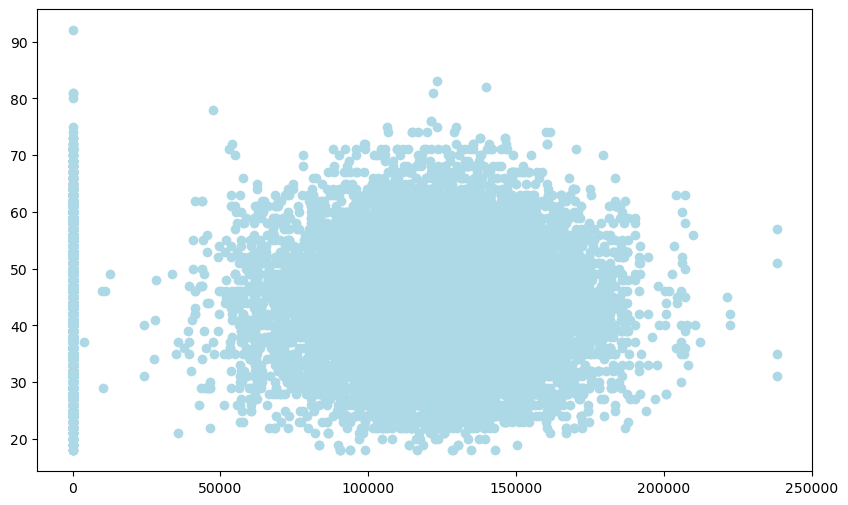

In [33]:
# plot scatter graph on age and account balance
# create figure
plt.figure(figsize=(10, 6))

# Scatter for individuals who did Exit
plt.scatter(customer_train_data.Balance[customer_train_data.Exited == 1],
            customer_train_data.Age[customer_train_data.Exited == 1],
            c="lightblue");